In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Which set of moves will get the best ratio of attack power to SP spent?
#Which team of 3 digimon have the highest attack? Defense? +
#What’s the tradeoff between HP and SP?
#Are some types over- or under-represented? +
#Both the moves and support skills have short text descriptions. Can an NLP analysis reveal underlying clusters of moves?
#Are different types and attributes evenly represented across stages? +

In [2]:
df = pd.read_csv('DigiDB_digimonlist.csv')
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [3]:
df.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


## Which team of 3 digimon have the highest attack?

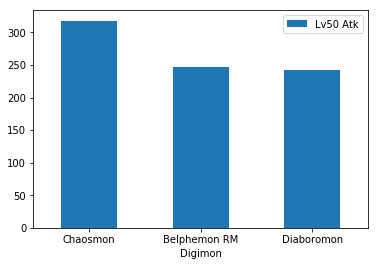

In [4]:
df[['Digimon', 'Lv50 Atk']].sort_values(by='Lv50 Atk', ascending=False).head(3).plot(kind='bar',x='Digimon',rot=0);

## Which team of 3 digimon have the highest defense?

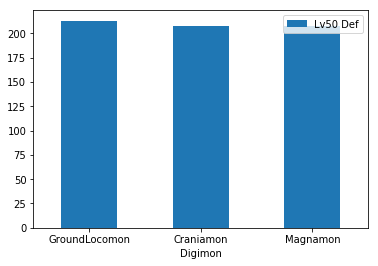

In [5]:
df[['Digimon', 'Lv50 Def']].sort_values(by='Lv50 Def', ascending=False).head(3).plot(kind='bar',x='Digimon', rot=0);

## What stage of digimon is the most popular?

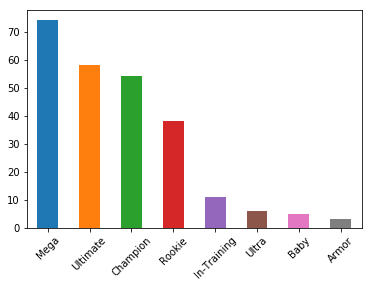

In [6]:
df['Stage'].value_counts().plot(kind='bar', rot=45);

## Which team of 3 digimon have the highest int?

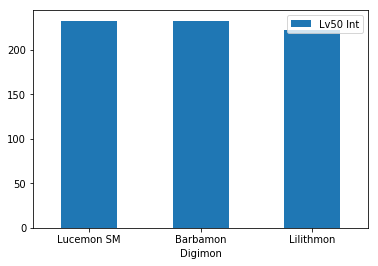

In [7]:
df[['Digimon', 'Lv50 Int']].sort_values(by='Lv50 Int', ascending=False).head(3).plot(kind='bar',x='Digimon', rot=0);

## Which team of 3 digimon have the highest speed?

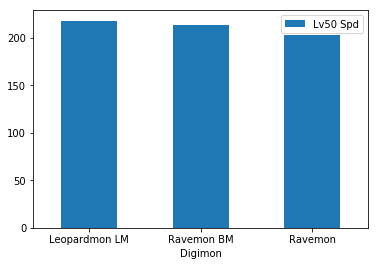

In [8]:
df[['Digimon', 'Lv50 Spd']].sort_values(by='Lv50 Spd', ascending=False).head(3).plot(kind='bar',x='Digimon', rot=0);

In [9]:
df_support = pd.read_csv('DigiDB_supportlist.csv')
df_support.head()

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...


In [10]:
df_moves = pd.read_csv('DigiDB_movelist.csv')
df_moves.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [11]:
df_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
Name           86 non-null object
Description    86 non-null object
dtypes: object(2)
memory usage: 1.4+ KB


In [12]:
df_moves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
Move           387 non-null object
SP Cost        387 non-null int64
Type           387 non-null object
Power          387 non-null int64
Attribute      387 non-null object
Inheritable    387 non-null object
Description    387 non-null object
dtypes: int64(2), object(5)
memory usage: 21.2+ KB


In [13]:
df_moves.describe()

,SP Cost,Power
count,387.000000,387.000000
mean,14.028424,60.180879
std,9.867606,45.223605
min,0.000000,0.000000
25%,6.000000,20.000000
50%,10.000000,65.000000
75%,20.000000,95.000000
max,60.000000,250.000000


In [14]:
df.Type.value_counts()

Virus      82
Vaccine    70
Data       60
Free       37
Name: Type, dtype: int64

In [15]:
df.Attribute.value_counts()

Dark        37
Fire        33
Light       29
Neutral     28
Plant       25
Electric    25
Wind        24
Water       24
Earth       24
Name: Attribute, dtype: int64

## Are some types over- or under-represented?

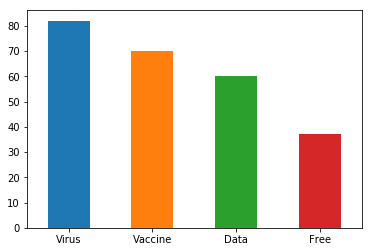

In [19]:
df['Type'].value_counts().plot(kind='bar',rot=0);

In [20]:
df.Stage.value_counts()

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

## Are different types and attributes evenly represented across stages?

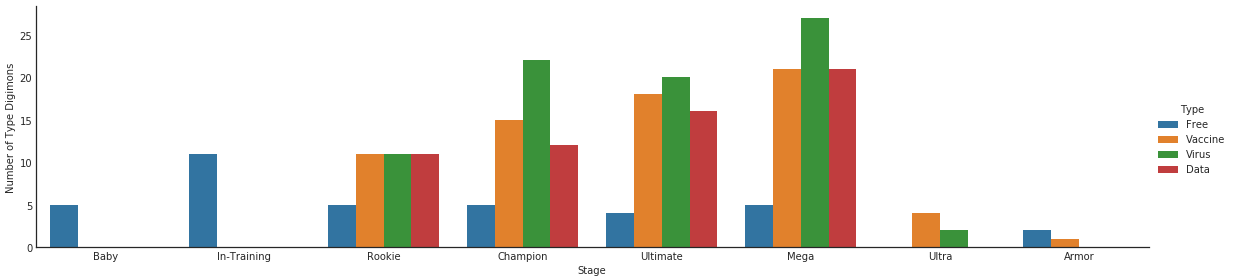

In [31]:
with sns.axes_style('white'):
    g = sns.factorplot("Stage", data=df, aspect=4.0, kind='count',
                       hue='Type')
    g.set_ylabels('Number of Type Digimons')

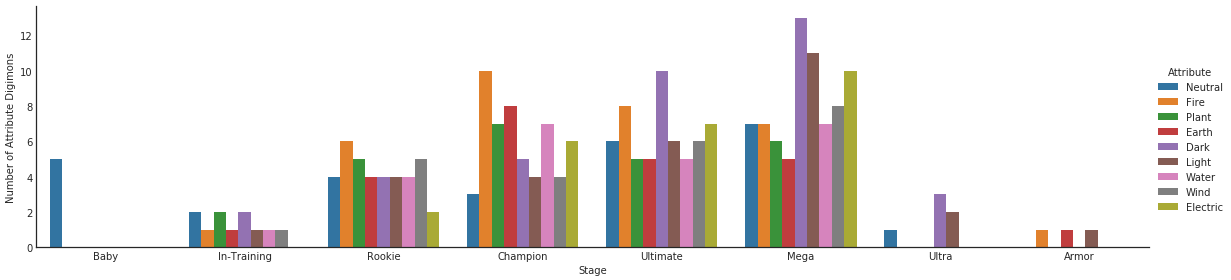

In [32]:
with sns.axes_style('white'):
    g = sns.factorplot("Stage", data=df, aspect=4.0, kind='count',
                       hue='Attribute')
    g.set_ylabels('Number of Attribute Digimons')

## What’s the tradeoff between HP and SP?

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


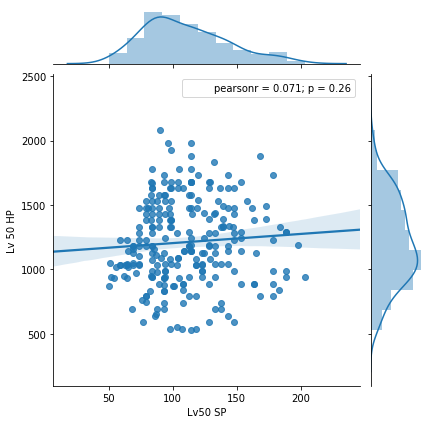

In [33]:
sns.jointplot('Lv50 SP', 'Lv 50 HP', data=df, kind='reg')